In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load the fisheye image
image_path = 'output68.jpg'
fisheye_img = cv2.imread(image_path)


In [15]:
# Get the dimensions of the image
h, w = fisheye_img.shape[:2]

In [16]:
# Approximate camera matrix and distortion coefficients for fisheye correction
K = np.array([[w, 0, w / 2], [0, w, h / 2], [0, 0, 1]])  # Intrinsic camera matrix
D = np.array([-0.3, 0.1, 0, 0])  # Fisheye distortion coefficients (can be tweaked)

In [17]:
# Create the mapping for undistortion
new_K, _ = cv2.getOptimalNewCameraMatrix(K, D, (w, h), 1, (w, h))
map1, map2 = cv2.initUndistortRectifyMap(K, D, np.eye(3), new_K, (w, h), cv2.CV_16SC2)

In [18]:
# Apply remap to correct fisheye distortion
undistorted_img = cv2.remap(fisheye_img, map1, map2, interpolation=cv2.INTER_LINEAR)

In [19]:
# Convert the dewarped image to grayscale for further processing
undistorted_gray = cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2GRAY)

In [20]:
# Apply CLAHE to improve contrast
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_gray = clahe.apply(undistorted_gray)

In [21]:
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(equalized_gray, (7, 7), 0)

In [22]:
# Apply Canny edge detection to highlight edges of objects (people)
edges = cv2.Canny(blurred, 50, 150)

In [23]:
# Apply morphological operations to close small gaps in edges
kernel = np.ones((5, 5), np.uint8)
closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

In [24]:
# Find contours on the edge-detected image
contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [25]:
# Filter out small contours to avoid noise
min_contour_area = 100  # Adjust this value as necessary
human_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

In [26]:
# Draw the contours on the dewarped image
output_image = undistorted_img.copy()
cv2.drawContours(output_image, human_contours, -1, (0, 255, 0), 2)

array([[[201, 201, 201],
        [187, 187, 187],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[182, 182, 182],
        [206, 206, 206],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[159, 159, 159],
        [204, 204, 204],
        [202, 202, 202],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [210, 210, 210],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [223, 223, 223],
        [179, 179, 179]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [175, 175, 175],
        [182, 182, 182]]

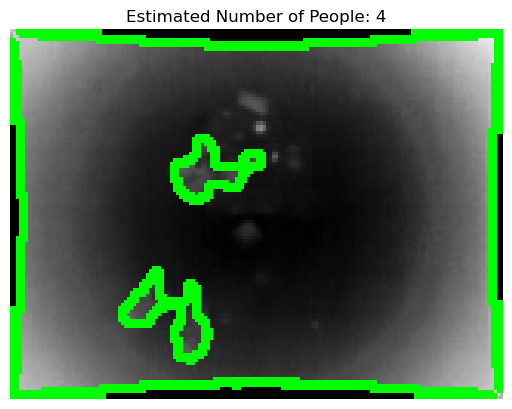

In [27]:

# Display the final output with the number of people detected
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title(f'Estimated Number of People: {len(human_contours)}')
plt.axis('off')
plt.show()


In [28]:

# Print the estimated number of people
print(f"Estimated Number of People: {len(human_contours)}")


Estimated Number of People: 4
